In [ ]:
# -------------------------------------------
# 1️⃣ Import des bibliothèques
# -------------------------------------------
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# -------------------------------------------
# 2️⃣ Charger le dataset
# -------------------------------------------
df = pd.read_csv("Telco-Customer-Churn.csv")

# Conversion de TotalCharges en numérique si nécessaire
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# -------------------------------------------
# 3️⃣ Séparer les types de variables
# -------------------------------------------
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                    'PaymentMethod']

# -------------------------------------------
# 4️⃣ Encodage des variables catégorielles pour SMOTE
# -------------------------------------------
df_encoded = df.copy()
le_dict = {}

for col in categorical_cols + ['Churn']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    le_dict[col] = le

# Séparer features et target
X = df_encoded[numeric_cols + categorical_cols]
y = df_encoded['Churn']

# -------------------------------------------
# 5️⃣ Augmentation avec SMOTE sur la classe cible
# -------------------------------------------
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)
X_res, y_res = smote.fit_resample(X, y)

# -------------------------------------------
# 6️⃣ Ajouter un petit bruit sur les colonnes numériques
# -------------------------------------------
X_res[numeric_cols] = X_res[numeric_cols].apply(lambda x: x + np.random.normal(0, 0.01*x.std(), size=x.shape))

# -------------------------------------------
# 7️⃣ Reconstruire le dataset final
# -------------------------------------------
df_final = pd.DataFrame(X_res, columns=X.columns)
df_final['Churn'] = y_res

# Décoder les variables catégorielles pour revenir aux valeurs originales
for col in categorical_cols + ['Churn']:
    le = le_dict[col]
    df_final[col] = le.inverse_transform(df_final[col])

# Ajouter l'identifiant client fictif
df_final['customerID'] = ['CUST' + str(i).zfill(5) for i in range(1, len(df_final)+1)]

# Réorganiser les colonnes
cols = ['customerID'] + numeric_cols + categorical_cols + ['Churn']
df_final = df_final[cols]

# -------------------------------------------
# 8️⃣ Vérification des distributions
# -------------------------------------------
print("Distribution finale des classes Churn:")
print(df_final['Churn'].value_counts(normalize=True))

# -------------------------------------------
# 9️⃣ Sauvegarder le dataset augmenté
# -------------------------------------------
df_final.to_csv("Telco-Customer-Churn-Augmented-Final.csv", index=False)
print("Dataset augmenté final sauvegardé avec succès !")


/tmp/ipython-input-1454650653.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


Distribution finale des classes Churn:
Churn
No     0.5
Yes    0.5
Name: proportion, dtype: float64
Dataset augmenté final sauvegardé avec succès !


/tmp/ipython-input-2544233004.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_original['TotalCharges'].fillna(df_original['TotalCharges'].median(), inplace=True)


Statistiques numériques avant augmentation:
             tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2281.916928
std      24.559481       30.090047   2265.270398
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    402.225000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000

Statistiques numériques après augmentation:
              tenure  MonthlyCharges  TotalCharges
count  10348.000000    10348.000000  10348.000000
mean      27.679467       68.197833   2050.288998
std       23.927291       28.593243   2178.625577
min       -0.481314       18.087197    -31.908041
25%        5.097273       45.810256    285.647542
50%       21.279837       75.015600   1175.645696
75%       48.152754       90.956210   3260.388241
max       72.794745      119.042804   8683.929236

Distribution Chur

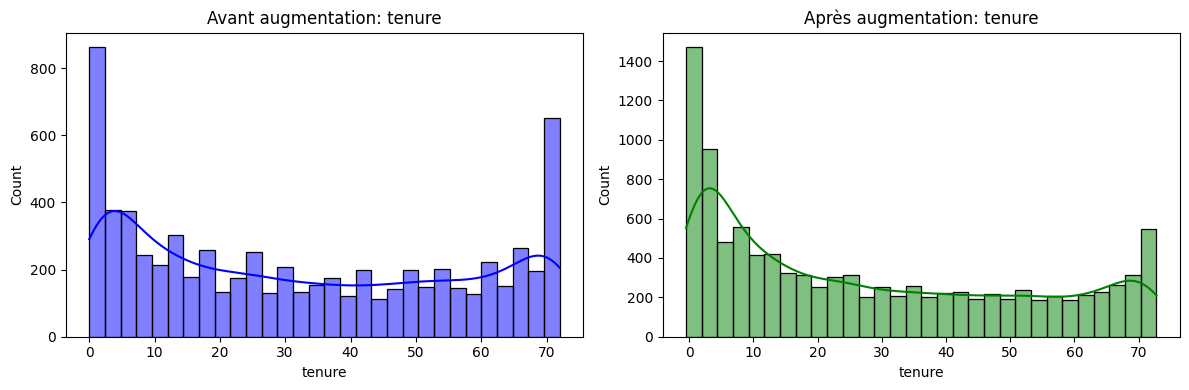

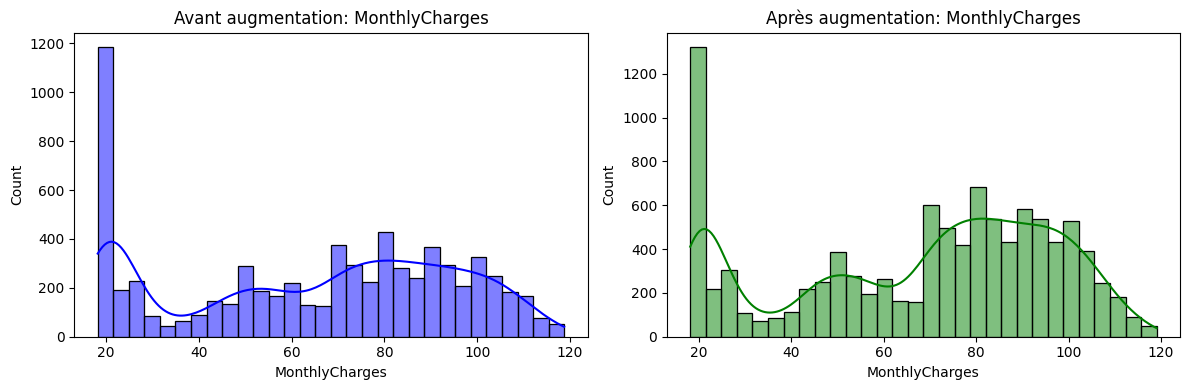

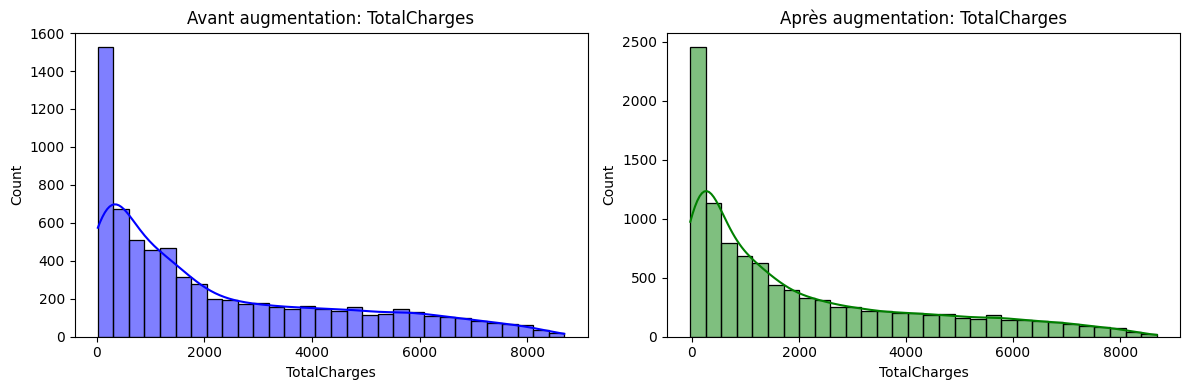

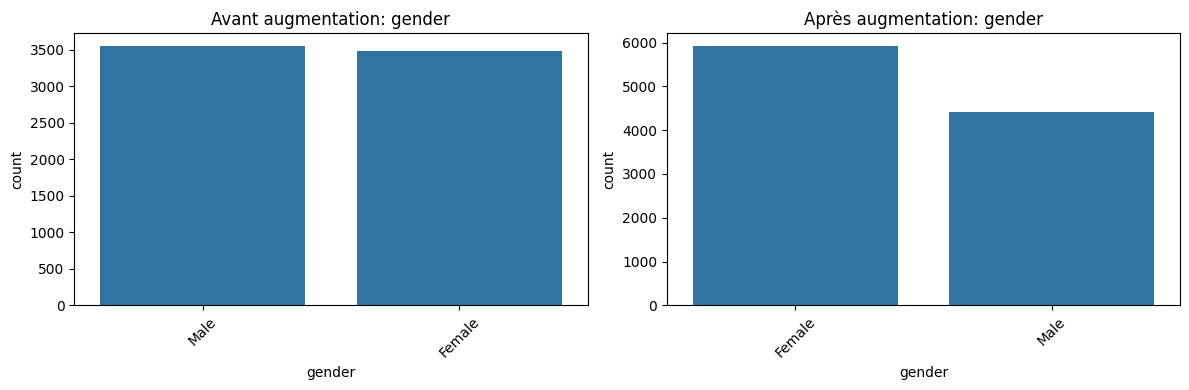

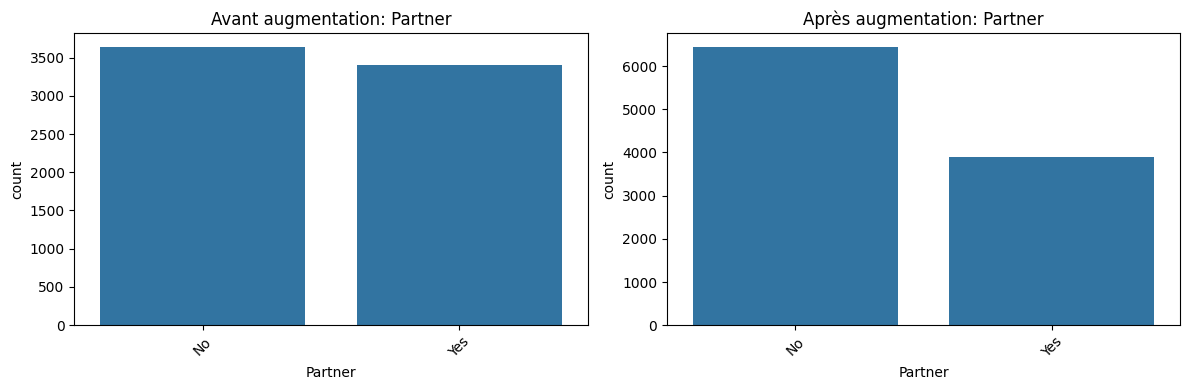

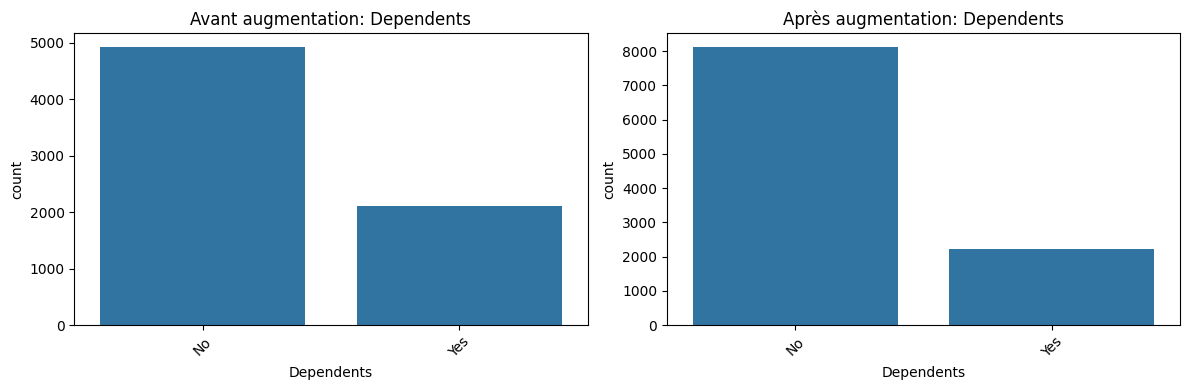

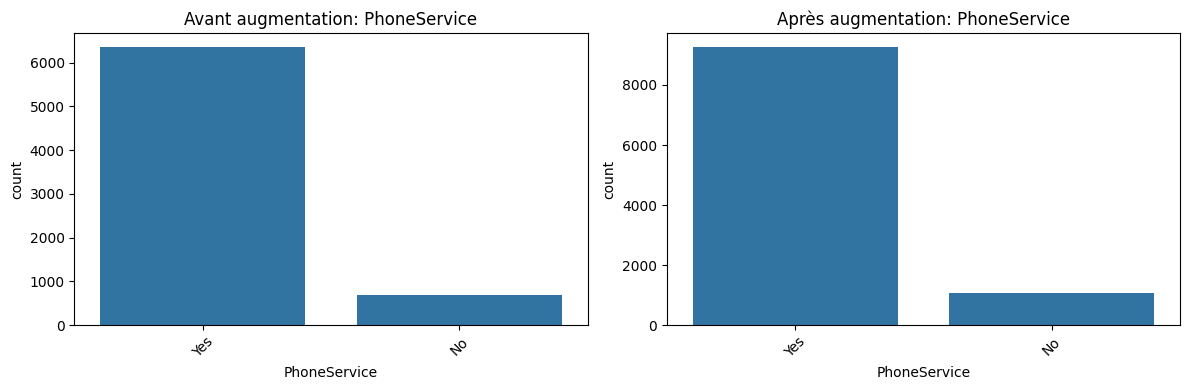

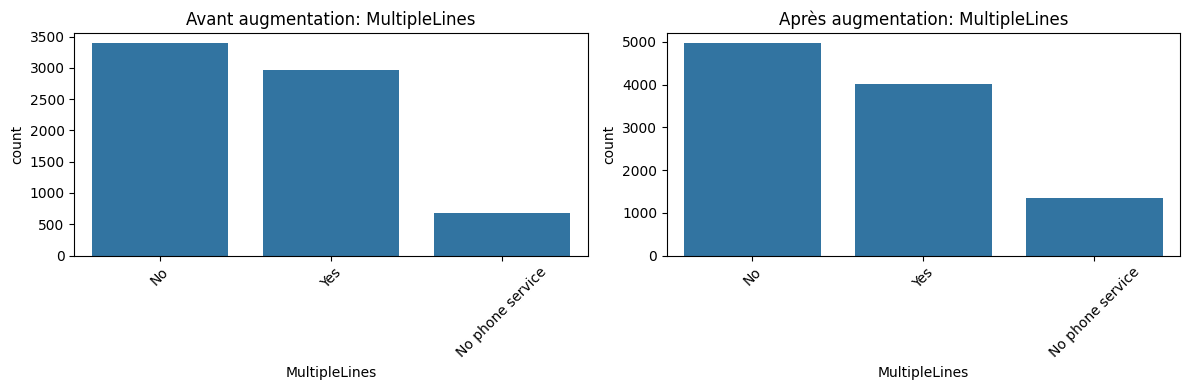

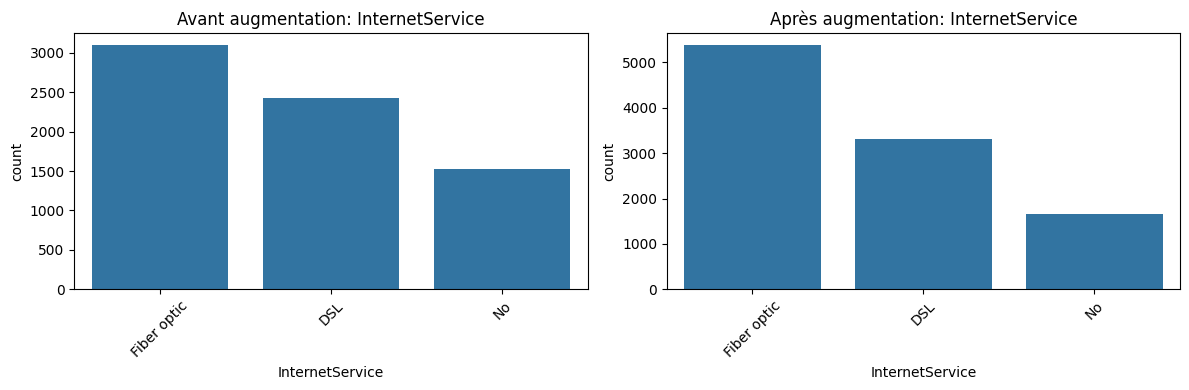

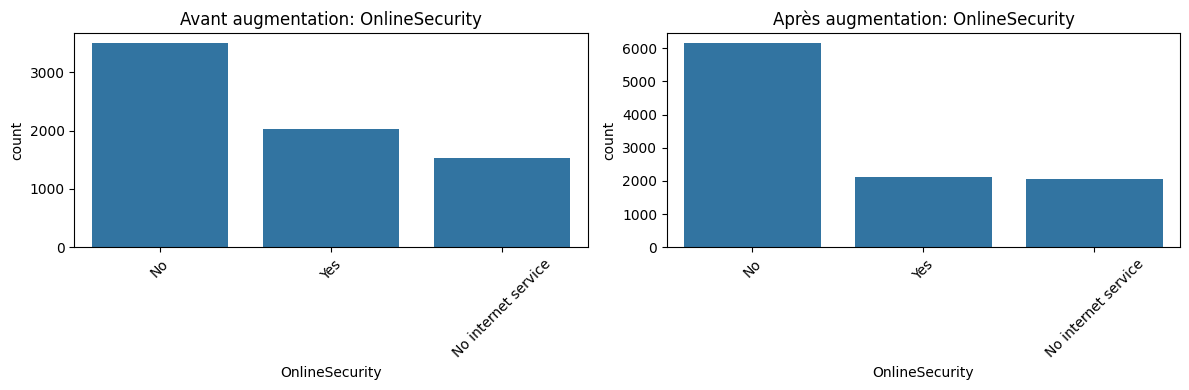

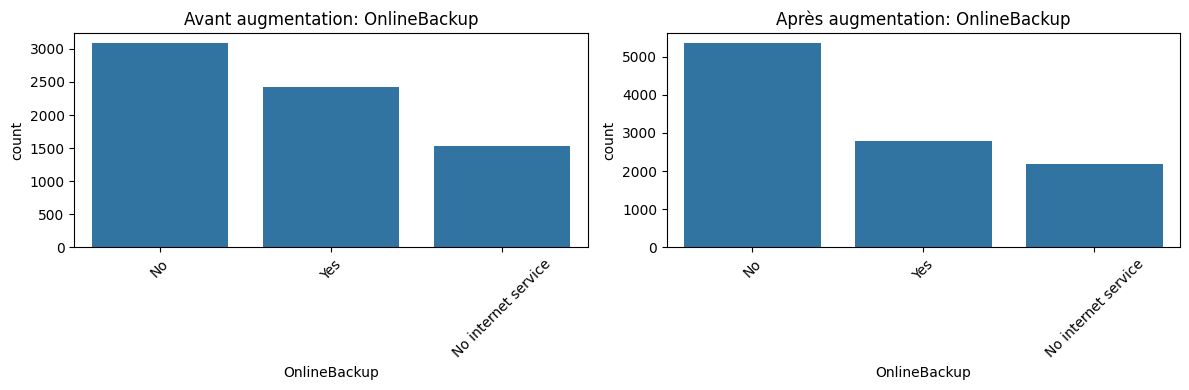

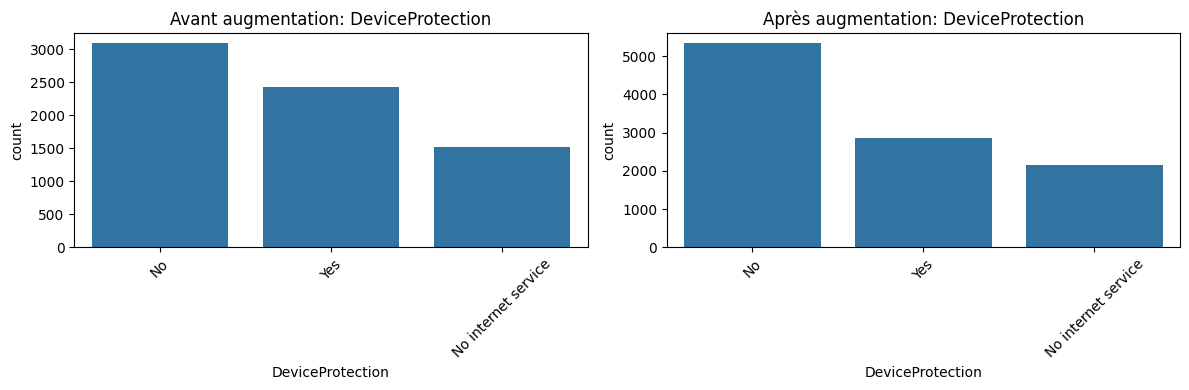

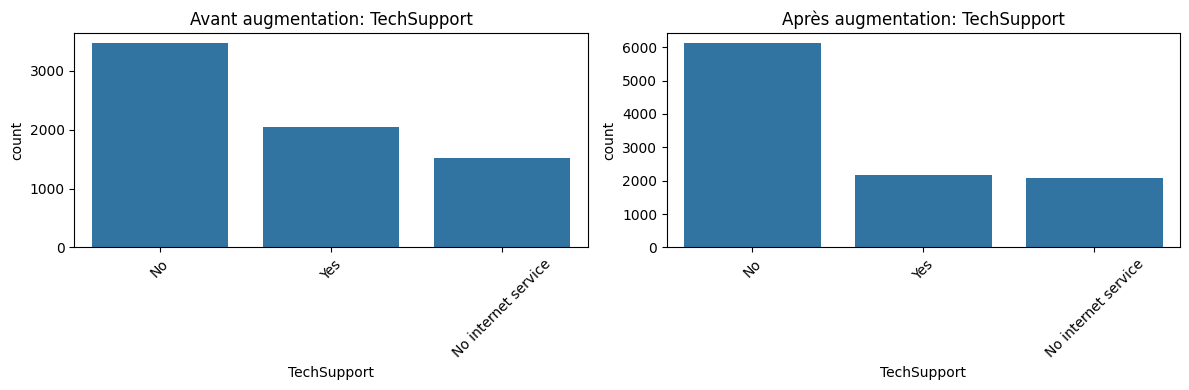

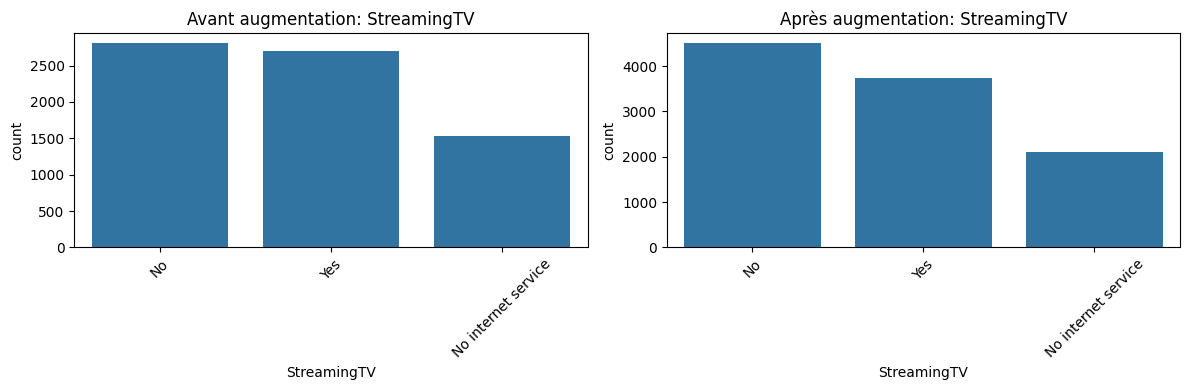

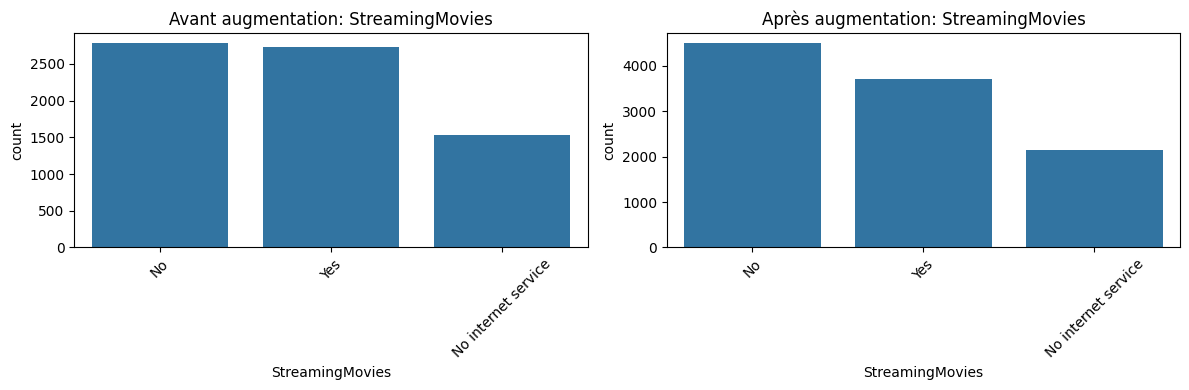

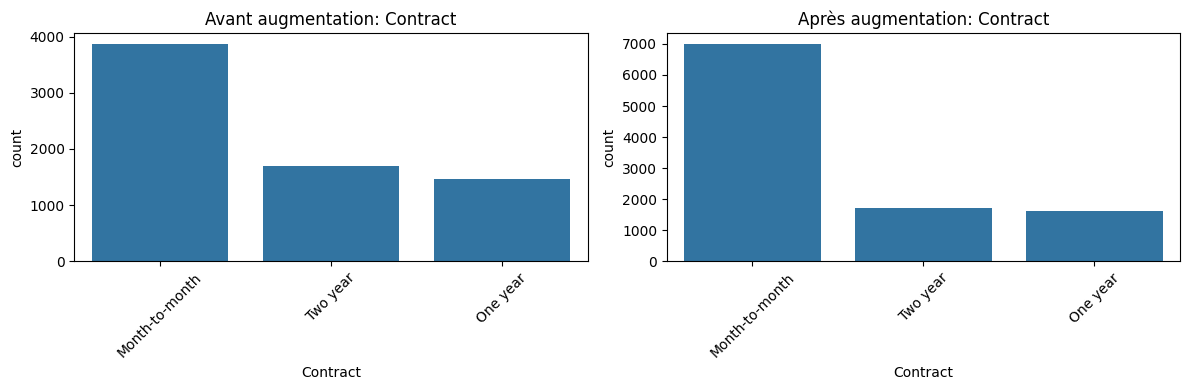

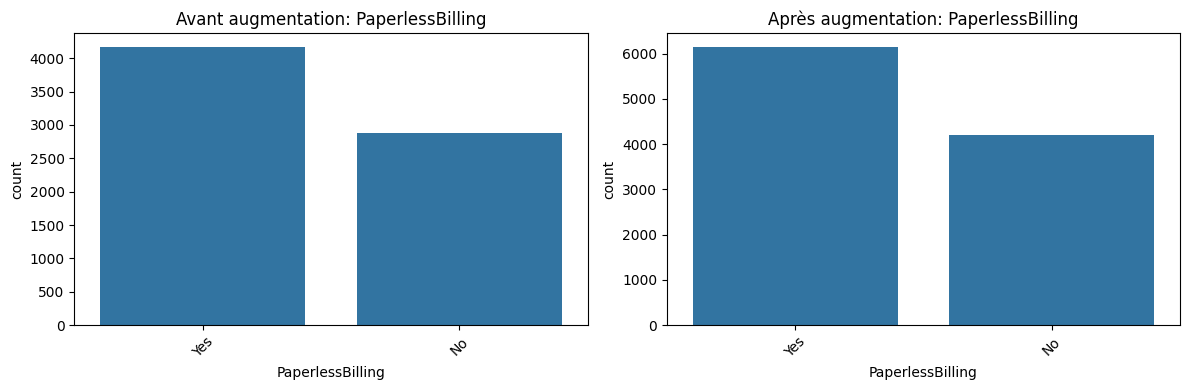

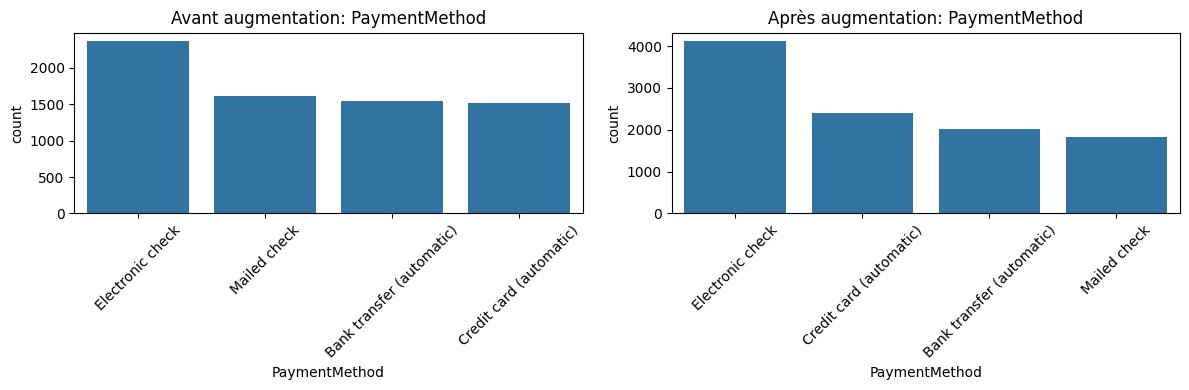

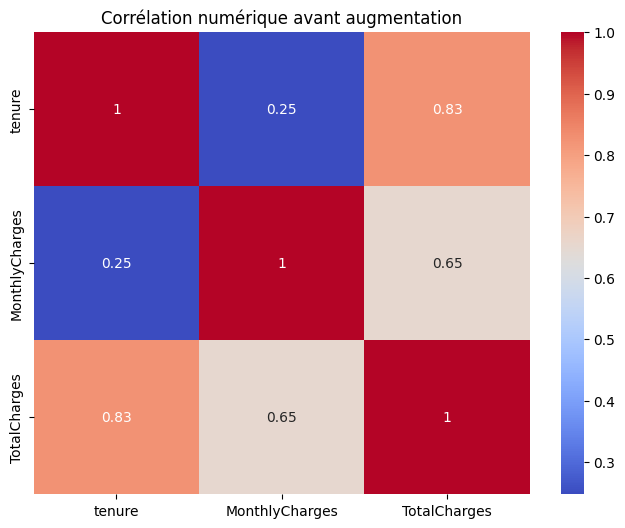

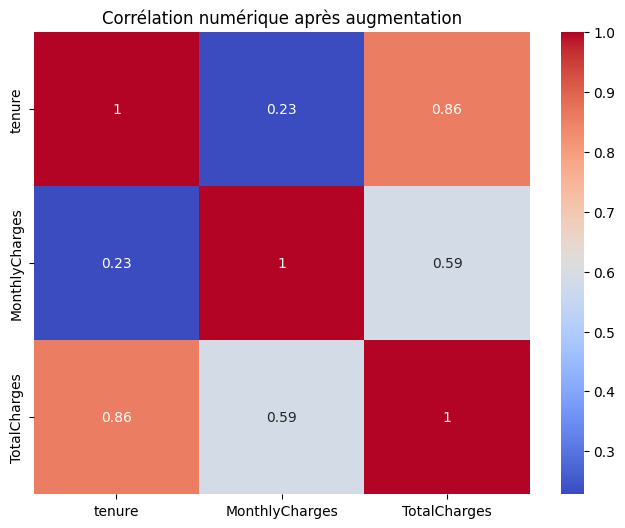

In [ ]:
# -------------------------------------------
# 1️⃣ Import des bibliothèques
# -------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# -------------------------------------------
# 2️⃣ Charger le dataset original
# -------------------------------------------
df_original = pd.read_csv("Telco-Customer-Churn.csv")

# Conversion de TotalCharges en numérique si nécessaire
df_original['TotalCharges'] = pd.to_numeric(df_original['TotalCharges'], errors='coerce')
df_original['TotalCharges'].fillna(df_original['TotalCharges'].median(), inplace=True)

# Colonnes numériques et catégorielles
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                    'PaymentMethod']

# -------------------------------------------
# 3️⃣ Encodage pour SMOTE
# -------------------------------------------
df_encoded = df_original.copy()
le_dict = {}
for col in categorical_cols + ['Churn']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    le_dict[col] = le

X = df_encoded[numeric_cols + categorical_cols]
y = df_encoded['Churn']

# -------------------------------------------
# 4️⃣ Augmentation avec SMOTE
# -------------------------------------------
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)
X_res, y_res = smote.fit_resample(X, y)

# Ajouter un léger bruit aux colonnes numériques
X_res[numeric_cols] = X_res[numeric_cols].apply(lambda x: x + np.random.normal(0, 0.01*x.std(), size=x.shape))

# Reconstruire le dataset final
df_augmented = pd.DataFrame(X_res, columns=X.columns)
df_augmented['Churn'] = y_res

# Décoder les catégories
for col in categorical_cols + ['Churn']:
    le = le_dict[col]
    df_augmented[col] = le.inverse_transform(df_augmented[col])

# Ajouter ID client
df_augmented['customerID'] = ['CUST' + str(i).zfill(5) for i in range(1, len(df_augmented)+1)]
cols = ['customerID'] + numeric_cols + categorical_cols + ['Churn']
df_augmented = df_augmented[cols]

# -------------------------------------------
# 5️⃣ Statistiques descriptives
# -------------------------------------------
print("Statistiques numériques avant augmentation:\n", df_original[numeric_cols].describe())
print("\nStatistiques numériques après augmentation:\n", df_augmented[numeric_cols].describe())

print("\nDistribution Churn avant:\n", df_original['Churn'].value_counts(normalize=True))
print("\nDistribution Churn après:\n", df_augmented['Churn'].value_counts(normalize=True))

# -------------------------------------------
# 6️⃣ Visualisation comparative des variables numériques
# -------------------------------------------
for col in numeric_cols:
    plt.figure(figsize=(12,4))

    # Avant
    plt.subplot(1,2,1)
    sns.histplot(df_original[col], bins=30, kde=True, color='blue')
    plt.title(f'Avant augmentation: {col}')

    # Après
    plt.subplot(1,2,2)
    sns.histplot(df_augmented[col], bins=30, kde=True, color='green')
    plt.title(f'Après augmentation: {col}')

    plt.tight_layout()
    plt.show()

# -------------------------------------------
# 7️⃣ Visualisation comparative des variables catégorielles
# -------------------------------------------
for col in categorical_cols:
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    sns.countplot(x=col, data=df_original, order=df_original[col].value_counts().index)
    plt.title(f'Avant augmentation: {col}')
    plt.xticks(rotation=45)

    plt.subplot(1,2,2)
    sns.countplot(x=col, data=df_augmented, order=df_augmented[col].value_counts().index)
    plt.title(f'Après augmentation: {col}')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

# -------------------------------------------
# 8️⃣ Matrices de corrélation
# -------------------------------------------
plt.figure(figsize=(8,6))
sns.heatmap(df_original[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Corrélation numérique avant augmentation")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df_augmented[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Corrélation numérique après augmentation")
plt.show()
